In [11]:
import pandas as pd
from fitter import Fitter, get_common_distributions
import numpy as np
import matplotlib.pyplot as plt


In [12]:
order_df_raw = pd.read_excel('Orders.xlsx')
restaurant_df_raw = pd.read_excel('Restaurants.xlsx')

In [13]:
# order_df_raw.head()
# order_df_raw.tail()
# order_df_raw.shape
# order_df_raw.columns
# order_df_raw['Restaurant ID'].unique()
# order_df_raw['Order Date'].unique()

# restaurant_df_raw

In [14]:
# Get array of order date (sorted ascending) for each restaurant

# type(order_df_raw.groupby('Restaurant ID')['Order Date'].apply(np.array).values)
# get unique time to simulate a single server
order_date_series_by_restaurant = order_df_raw.sort_values(['Restaurant ID', 'Order Date']).groupby('Restaurant ID')['Order Date'].apply(lambda x: np.unique(np.array(x)))
order_date_dict_by_restaurant = order_date_series_by_restaurant.to_dict()
order_date_series_by_restaurant.loc[1]

array(['2022-01-01T11:10:00.000000000', '2022-01-01T11:19:00.000000000',
       '2022-01-01T12:00:00.000000000', '2022-01-01T12:19:00.000000000',
       '2022-01-01T13:31:00.000000000', '2022-01-01T13:39:00.000000000',
       '2022-01-01T14:10:00.000000000', '2022-01-01T14:20:00.000000000',
       '2022-01-01T14:21:00.000000000', '2022-01-01T14:22:00.000000000',
       '2022-01-01T14:31:00.000000000', '2022-01-01T15:22:00.000000000',
       '2022-01-01T17:39:00.000000000', '2022-01-01T19:21:00.000000000',
       '2022-01-01T20:31:00.000000000', '2022-01-01T20:35:00.000000000',
       '2022-01-01T21:39:00.000000000', '2022-01-01T23:58:00.000000000'],
      dtype='datetime64[ns]')

Assumptions and context:
1. Orders are made in one day
2. No breaks between orders
3. Only one order can be placed at a time

In [15]:
# get intervals in minutes
intervals_dict_by_restaurant = {}
for k, v in order_date_dict_by_restaurant.items():
    intervals_dict_by_restaurant[k] = ((v[1:] - v[:-1]) / (1000000000*60)).astype('float64')
# intervals_dict_by_restaurant
# order_date_dict_by_restaurant

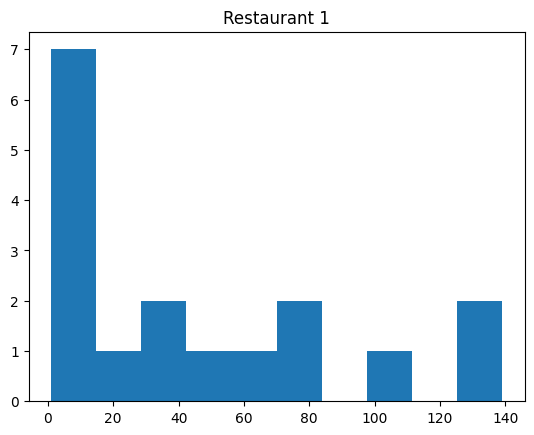

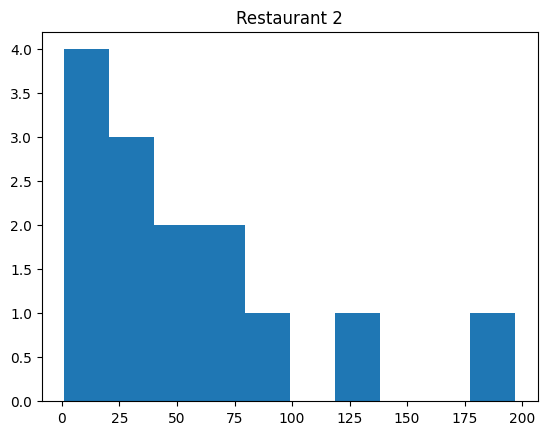

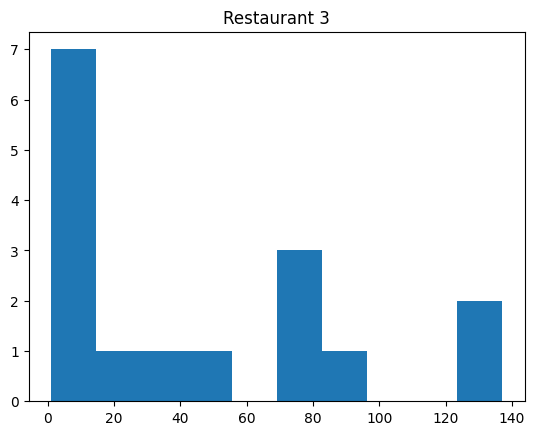

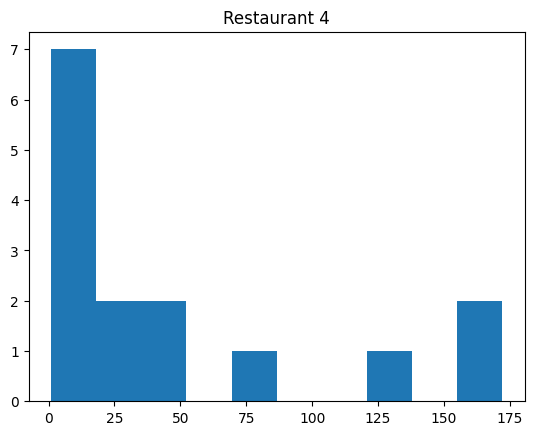

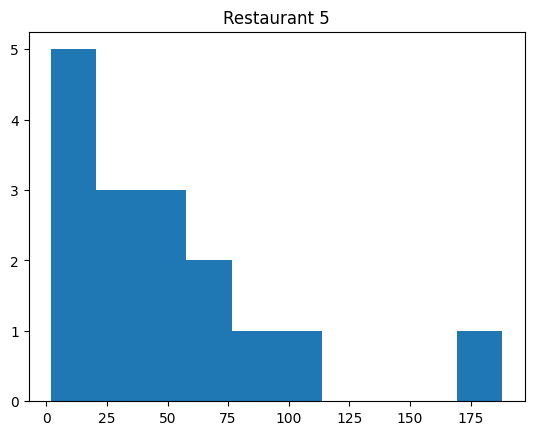

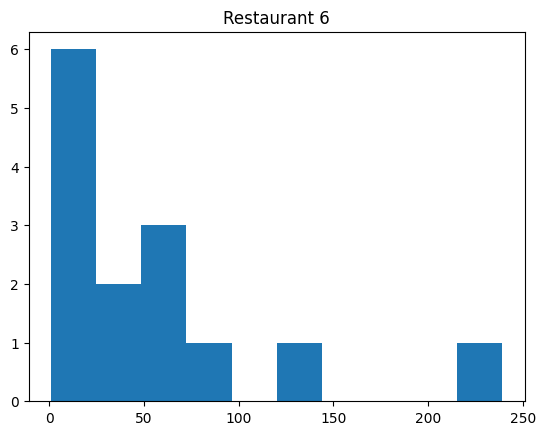

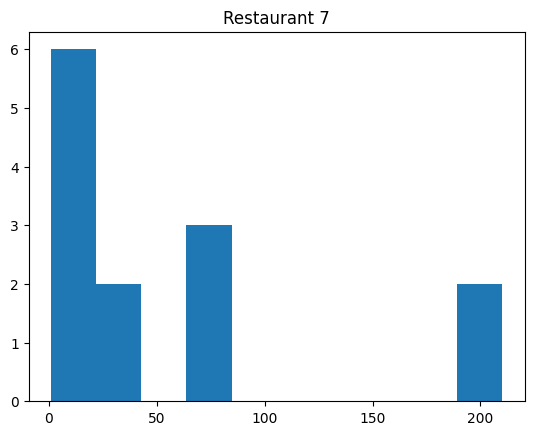

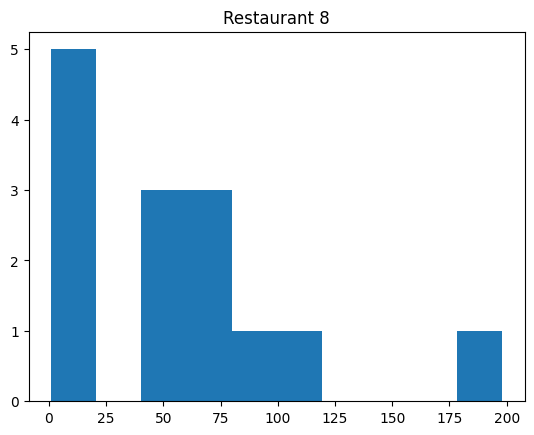

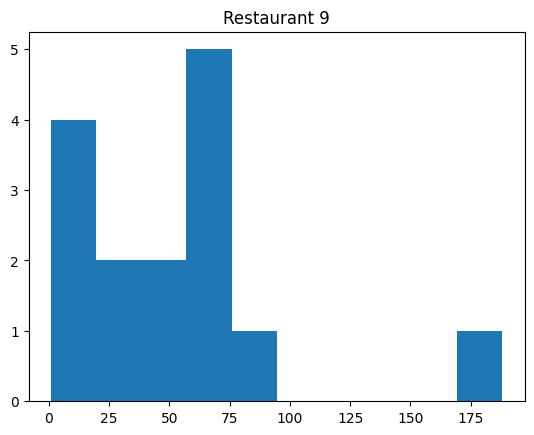

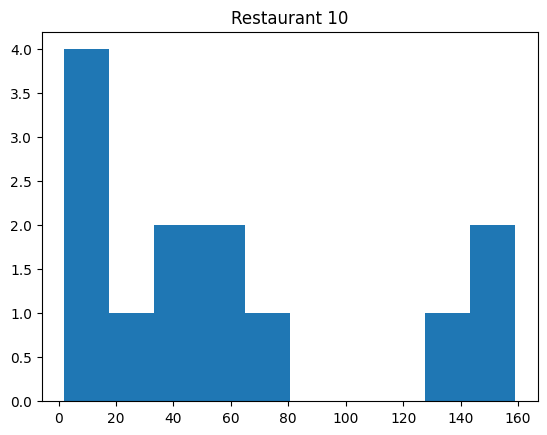

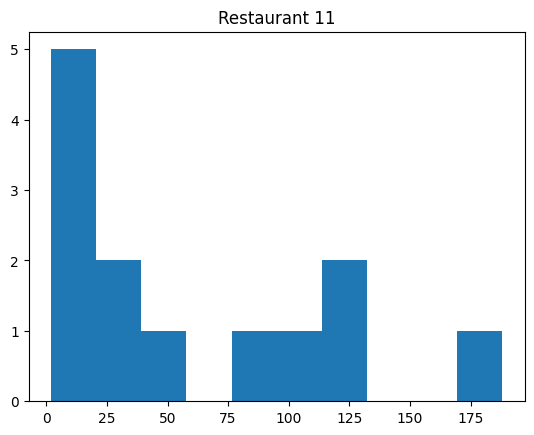

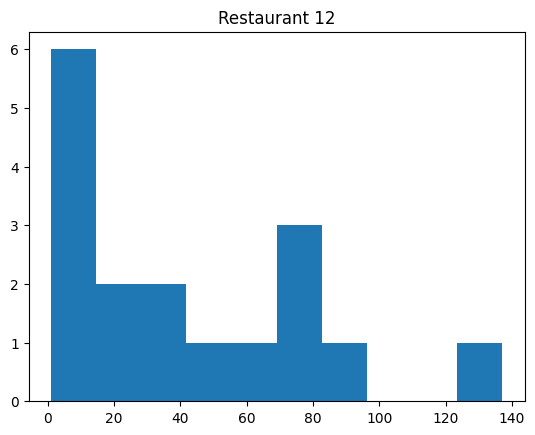

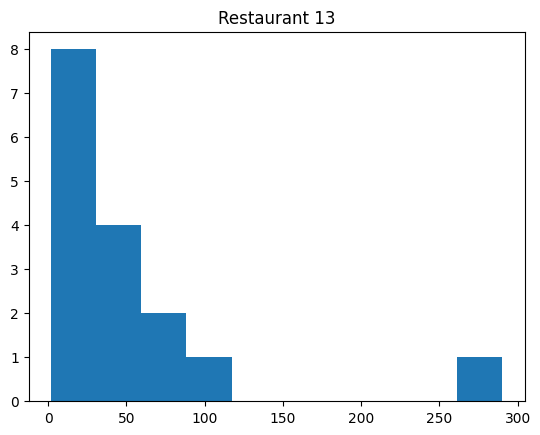

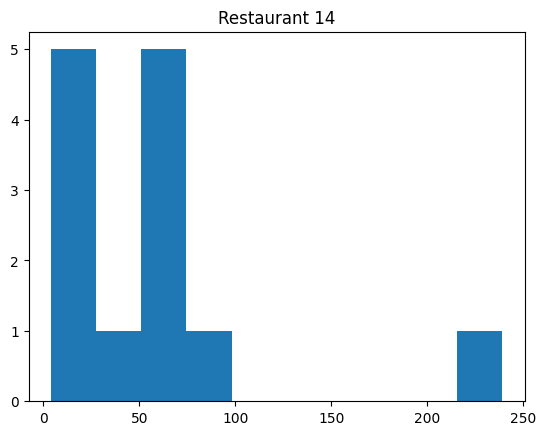

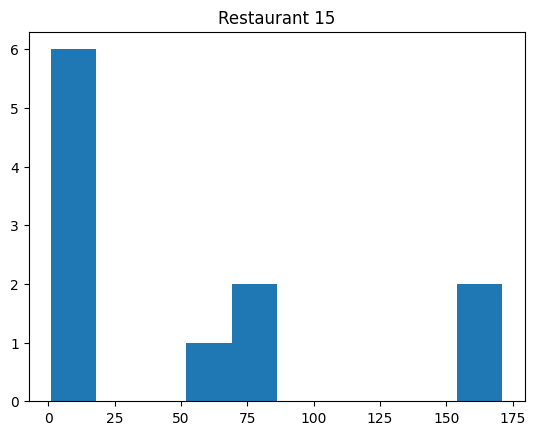

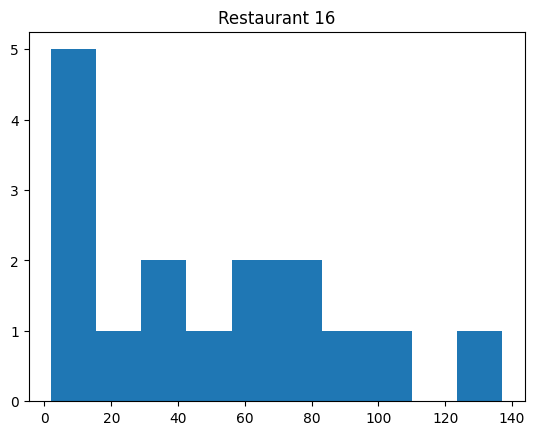

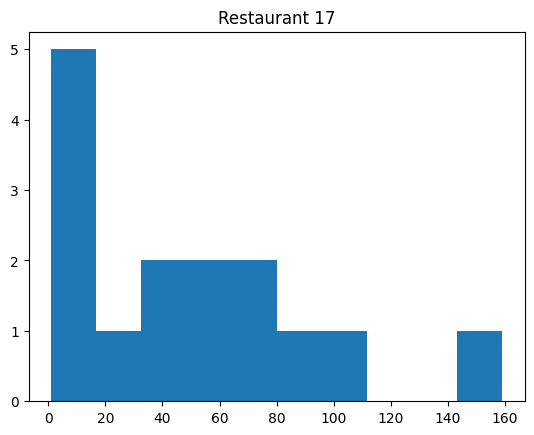

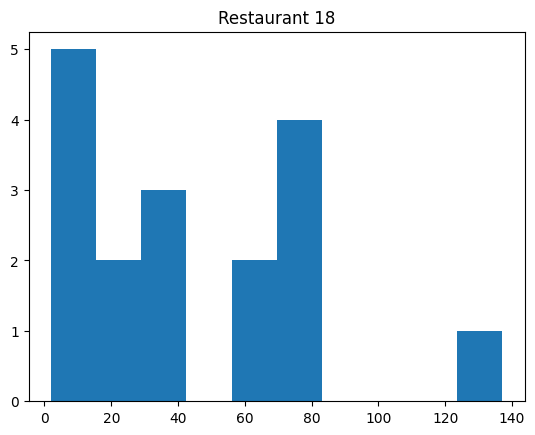

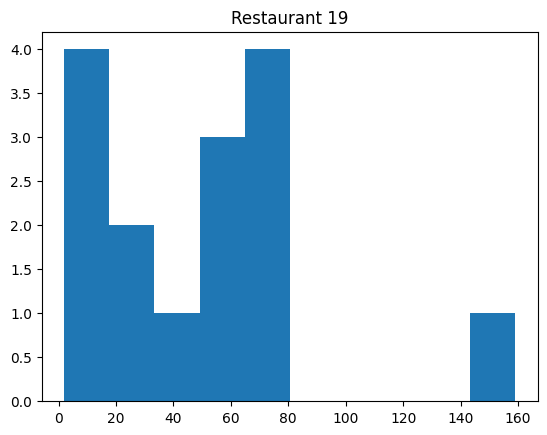

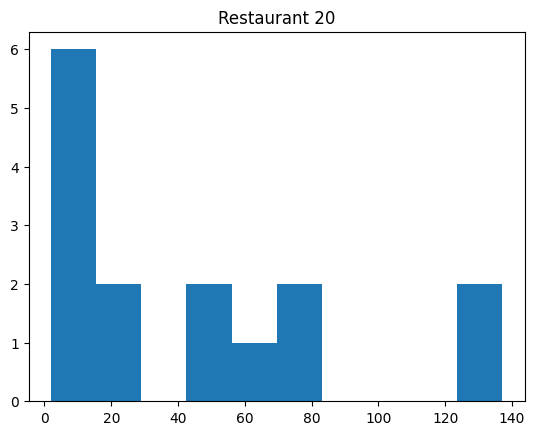

In [16]:
# view distribution of intervals for each restaurant

for k, v in intervals_dict_by_restaurant.items():
    plt.hist(v)
    plt.title('Restaurant {k}'.format(k=k))
    plt.show()

In [17]:
# find best fitting distribution to explain

for k, v in intervals_dict_by_restaurant.items():
    f = Fitter(v, distributions=get_common_distributions())
    f.fit()
    # f.summary()
    print('Restaurant ', k)
    print(f.get_best(method="sumsquare_error"))
    print("\n")

# f = Fitter(intervals_dict_by_restaurant[1], distributions=get_common_distributions())
# f.fit()
# f.summary()

# f.get_best(method="sumsquare_error",)

Restaurant  1
{'powerlaw': {'a': 0.450268210369011, 'loc': 0.9999999999999998, 'scale': 141.75646330355954}}


Restaurant  2
{'powerlaw': {'a': 0.5049167854996736, 'loc': 0.9999999999999998, 'scale': 197.57873155800706}}


Restaurant  3
{'lognorm': {'s': 6.708175935630649, 'loc': 0.9999999999999999, 'scale': 4.055760281310221}}


Restaurant  4
{'gamma': {'a': 0.4933247494540943, 'loc': 0.9999999999999999, 'scale': 39.60016837300023}}


Restaurant  5
{'powerlaw': {'a': 0.4862397553375557, 'loc': 1.9999999999999998, 'scale': 191.516142934614}}


Restaurant  6
{'gamma': {'a': 0.4319750075289103, 'loc': 0.9999999999999998, 'scale': 72.97382400964926}}


Restaurant  7
{'powerlaw': {'a': 0.1497535132818423, 'loc': 0.9999999999999989, 'scale': 209.14479283708545}}


Restaurant  8
{'powerlaw': {'a': 0.35017509456814777, 'loc': 0.9999999999999999, 'scale': 197.4966010515001}}


Restaurant  9
{'powerlaw': {'a': 0.4513602539879833, 'loc': 0.9999999999999998, 'scale': 195.5705562925553}}


Restaur